In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('../Data/Cleaned/Algerian_forest_fires_dataset_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    int64  
 11  Region       244 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 23.0 KB


In [104]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [105]:
df.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0


In [106]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [107]:
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=404)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 11), (61, 11), (183,), (61,))

# Feature Selection

In [110]:
corr = X_train.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.636274,-0.263049,-0.271448,0.650906,0.466380,0.345953,0.577147,0.439163,0.495718,0.290424
RH,-0.636274,1.000000,0.226164,0.213981,-0.650743,-0.423221,-0.229233,-0.686437,-0.366833,-0.434992,-0.444391
Ws,-0.263049,0.226164,1.000000,0.240853,-0.131065,-0.016037,0.094206,0.019397,0.026507,-0.050628,-0.230389
Rain,-0.271448,0.213981,0.240853,1.000000,-0.499260,-0.260350,-0.290349,-0.324833,-0.279081,-0.355406,-0.049097
FFMC,0.650906,-0.650743,-0.131065,-0.499260,1.000000,0.585146,0.498180,0.731830,0.581542,0.760194,0.204026
DMC,0.466380,-0.423221,-0.016037,-0.260350,0.585146,1.000000,0.864567,0.667187,0.980411,0.557147,0.228729
DC,0.345953,-0.229233,0.094206,-0.290349,0.498180,0.864567,1.000000,0.500945,0.934299,0.503938,-0.041721
ISI,0.577147,-0.686437,0.019397,-0.324833,0.731830,0.667187,0.500945,1.000000,0.637308,0.717358,0.249309
BUI,0.439163,-0.366833,0.026507,-0.279081,0.581542,0.980411,0.934299,0.637308,1.000000,0.571771,0.126672
Classes,0.495718,-0.434992,-0.050628,-0.355406,0.760194,0.557147,0.503938,0.717358,0.571771,1.000000,0.106854


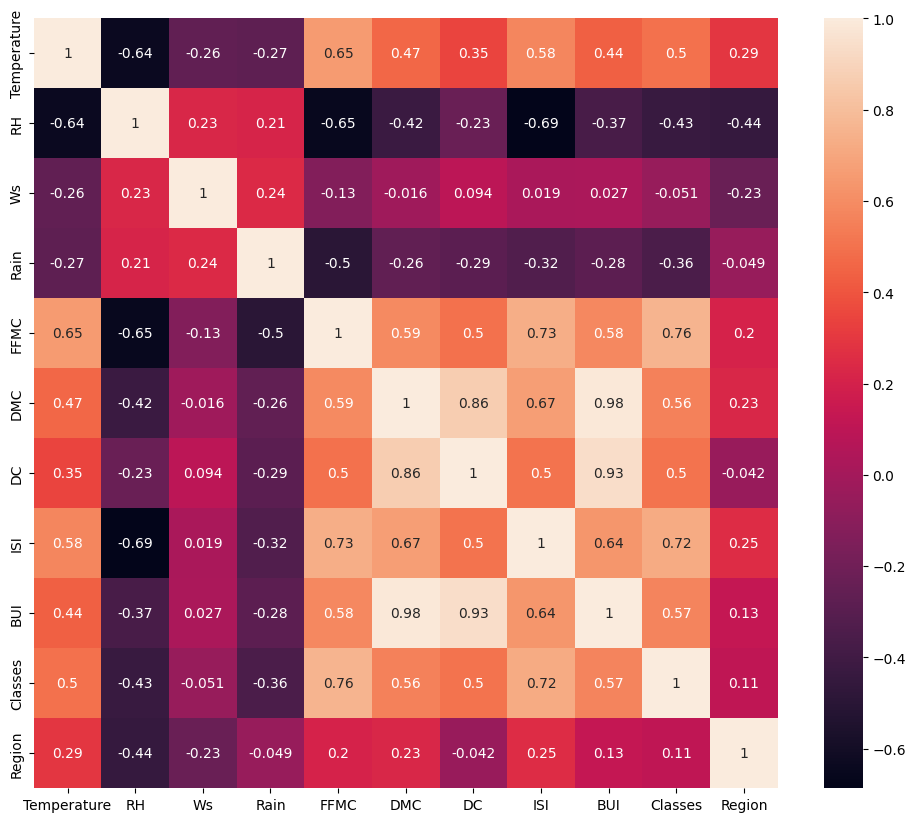

In [111]:
# Check for colliearity
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [112]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [113]:
#threshold - normal threshold is setup by a domain expert
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [114]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [115]:
X_train.shape, X_test.shape

((183, 9), (61, 9))

# Feature Scaling and Stadardisation

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

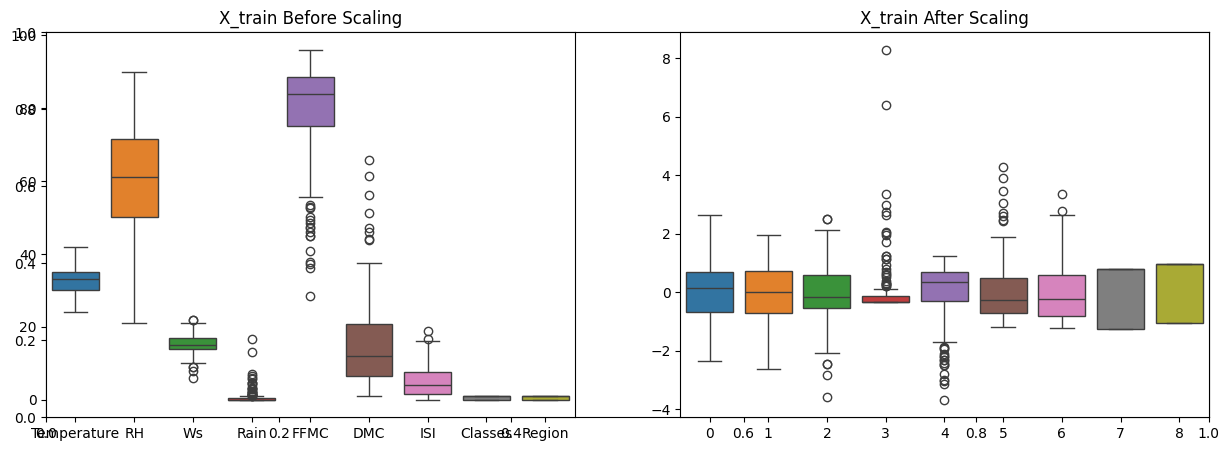

In [118]:
# Boxplots to understand effect of standard scaling

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

# Training Model
## Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [120]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [121]:
y_pred = linreg.predict(X_test)

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae, mse, r2)

0.6173480889567171 0.7666230294502725 0.9868042556207678


## Lasso Regression

In [123]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [124]:
lasso.fit(X_train_scaled, y_train)

Lasso()

In [125]:
y_pred_lasso = lasso.predict(X_test)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(mae, mse, r2)

1.1173453530993291 2.539797095463978 0.9562829292111252


## Ridge Regression

In [127]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [128]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [129]:
y_pred_ridge = ridge.predict(X_test)

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(mae, mse, r2)

0.6234970830181162 0.7819480633655819 0.9865404685671822


## ElasticNet

In [131]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [132]:
elasticnet.fit(X_train_scaled, y_train)

ElasticNet()

In [133]:
y_pred_elasticnet = elasticnet.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_elasticnet)
mse = mean_squared_error(y_test, y_pred_elasticnet)
r2 = r2_score(y_test, y_pred_elasticnet)

print(mae, mse, r2)

1.6566071047576936 5.609234843299677 0.9034492490939882


## Cross Validation

In [135]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [136]:
lasso_cv.alpha_

np.float64(0.038671705685899)

In [137]:
lasso_cv.alphas_

array([6.7579904 , 6.30252446, 5.87775541, 5.48161436, 5.1121719 ,
       4.76762863, 4.44630641, 4.14664024, 3.86717057, 3.60653622,
       3.36346774, 3.13678128, 2.92537272, 2.72821239, 2.54434   ,
       2.37286   , 2.21293718, 2.06379262, 1.9246999 , 1.79498157,
       1.67400582, 1.56118343, 1.45596489, 1.35783773, 1.26632401,
       1.18097801, 1.10138405, 1.02715445, 0.95792768, 0.89336656,
       0.83315664, 0.77700467, 0.72463716, 0.67579904, 0.63025245,
       0.58777554, 0.54816144, 0.51121719, 0.47676286, 0.44463064,
       0.41466402, 0.38671706, 0.36065362, 0.33634677, 0.31367813,
       0.29253727, 0.27282124, 0.254434  , 0.237286  , 0.22129372,
       0.20637926, 0.19246999, 0.17949816, 0.16740058, 0.15611834,
       0.14559649, 0.13578377, 0.1266324 , 0.1180978 , 0.1101384 ,
       0.10271545, 0.09579277, 0.08933666, 0.08331566, 0.07770047,
       0.07246372, 0.0675799 , 0.06302524, 0.05877755, 0.05481614,
       0.05112172, 0.04767629, 0.04446306, 0.0414664 , 0.03867

In [138]:
lasso_cv.coef_

array([ 0.        , -0.        ,  0.03203544, -0.        , -0.48304357,
        3.3836541 ,  4.72947898,  0.2371087 , -0.34136095])

In [139]:
lasso_cv.mse_path_

array([[49.8282676 , 53.65698358, 64.39298004, 53.86764487, 44.26830261],
       [43.71188194, 47.98523516, 62.79414406, 48.5715755 , 39.10958111],
       [38.35703986, 43.05276593, 55.92663872, 43.91791395, 34.48667641],
       [33.73068532, 38.76324843, 49.39155953, 39.82618126, 30.09618401],
       [29.7358799 , 35.03290434, 43.48132184, 36.2261656 , 26.27699205],
       [26.28833791, 31.6112768 , 38.32047708, 32.959353  , 22.95465761],
       [23.31506064, 27.554162  , 33.81271071, 28.86744431, 20.06450466],
       [20.75253065, 24.03480829, 29.8741001 , 25.30593219, 17.55012676],
       [18.54566553, 20.98343794, 26.4320123 , 22.20573398, 15.3629165 ],
       [16.64655614, 18.33799102, 23.42274538, 19.50693666, 13.46014181],
       [15.01394667, 16.04502374, 20.79096957, 17.15741931, 11.80478496],
       [13.61174489, 14.05809233, 18.48849144, 15.11183891, 10.36464786],
       [12.40874301, 12.33637905, 16.47332906, 13.3302909 ,  9.11172437],
       [11.37787885, 10.84579982, 14.7

In [140]:
lasso_cv.intercept_

np.float64(7.4021857923497265)

In [141]:
y_pred_lasso_cv = lasso_cv.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lasso_cv)
mse = mean_squared_error(y_test, y_pred_lasso_cv)
r2 = r2_score(y_test, y_pred_lasso_cv)

print(mae, mse, r2)

0.6434390581658183 0.8112533539280316 0.9860360418693586


In [143]:
from sklearn.linear_model import RidgeCV
ridge_Cv = RidgeCV(cv=5)
ridge_Cv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [144]:
y_pred_ridge_cv = ridge_Cv.predict(X_test)

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ridge_cv)
mse = mean_squared_error(y_test, y_pred_ridge_cv)
r2 = r2_score(y_test, y_pred_ridge_cv)

print(mae, mse, r2)

0.6234970830181162 0.7819480633655819 0.9865404685671822


In [146]:
ridge_Cv.alpha_

np.float64(1.0)

In [147]:
ridge_Cv.coef_

array([ 0.03355439, -0.16896916,  0.09697702, -0.08573455, -0.77747527,
        3.43791467,  4.642883  ,  0.41838456, -0.40203672])

In [148]:
# Pickle the ml models, preproceesing objects and columns

In [149]:
import pickle
pickle.dump(ridge, open('./Models/ForestFire/ridge.pkl', 'wb'))
pickle.dump(scaler, open('./Models/ForestFire/scaler.pkl', 'wb'))